In [ ]:
!conda install -y -c conda-forge prophet
!conda install -y plotly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time
import requests
import json
from datetime import datetime as dt

In [2]:
def get_btcprice(ticker,max):
    url = ('https://api.coingecko.com/api/v3/coins/')+ticker+('/market_chart?vs_currency=jpy&days=')+max
    r = requests.get(url)
    r2 = json.loads(r.text)
    return r2

In [3]:
# jsonから価格データだけをPandasに変換して抽出する
def get_price(r2):
    s = pd.DataFrame(r2['prices'])
    s.columns = ['date', 'price']
    date = []
    for i in s['date']:
        tsdate = int(i / 1000)
        loc = dt.utcfromtimestamp(tsdate)
        date.append(loc)
    s.index = date
    del s['date']
    return s

In [4]:
# ビットコインの全期間の価格データを取得する
r2 = get_btcprice('bitcoin', 'max')
btc = get_price(r2)
btc['price'] = btc['price'].astype(int)

In [5]:
# prohet用のdataframeにする
btc.index.name = 'ds'
df = btc
df = df.rename(columns={'price':'y'})
df = df.reset_index()
df

,ds,y
0,2013-04-28 00:00:00,13203
1,2013-04-29 00:00:00,14108
2,2013-04-30 00:00:00,13629
3,2013-05-01 00:00:00,11364
4,2013-05-02 00:00:00,10350
...,...,...
3149,2021-12-13 00:00:00,5681523
3150,2021-12-14 00:00:00,5303462
3151,2021-12-15 00:00:00,5506483
3152,2021-12-16 00:00:00,5586130


In [6]:
# month, year カラムの追加
df['year'] = df['ds'].dt.year 
df['month'] = df['ds'].dt.month
df

,ds,y,year,month
0,2013-04-28 00:00:00,13203,2013,4
1,2013-04-29 00:00:00,14108,2013,4
2,2013-04-30 00:00:00,13629,2013,4
3,2013-05-01 00:00:00,11364,2013,5
4,2013-05-02 00:00:00,10350,2013,5
...,...,...,...,...
3149,2021-12-13 00:00:00,5681523,2021,12
3150,2021-12-14 00:00:00,5303462,2021,12
3151,2021-12-15 00:00:00,5506483,2021,12
3152,2021-12-16 00:00:00,5586130,2021,12


In [7]:
# 2021年10月分のデータフレーム作成
df_202110 = df[(df['month'] == 10) & (df['year'] == 2021)].reset_index(drop=True)
# df_202110 = df[(df['ds'] >= dt(2021,10,1)) & (df['ds'] < dt(2021,10,31))].reset_index(drop=True)
df_202110

,ds,y,year,month
0,2021-10-01,4888999,2021,10
1,2021-10-02,5351874,2021,10
2,2021-10-03,5306986,2021,10
3,2021-10-04,5356705,2021,10
4,2021-10-05,5465816,2021,10
5,2021-10-06,5761084,2021,10
6,2021-10-07,6173848,2021,10
7,2021-10-08,6018409,2021,10
8,2021-10-09,6062726,2021,10
9,2021-10-10,6185352,2021,10


In [8]:
# 2021年11月分のデータフレーム作成
df_202111 = df[(df['month'] == 11) & (df['year'] == 2021)].reset_index(drop=True)
# df_202111 = df[(df['ds'] >= dt(2021,11,1)) & (df['ds'] <= dt(2021,11,30))].reset_index(drop=True)
df_202111

,ds,y,year,month
0,2021-11-01,7020855,2021,11
1,2021-11-02,6974062,2021,11
2,2021-11-03,7207841,2021,11
3,2021-11-04,7202090,2021,11
4,2021-11-05,7013651,2021,11
5,2021-11-06,6946372,2021,11
6,2021-11-07,6993322,2021,11
7,2021-11-08,7167354,2021,11
8,2021-11-09,7659317,2021,11
9,2021-11-10,7581048,2021,11


## Use prohet

In [9]:
from prophet import Prophet

In [10]:
m = Prophet()
m.fit(df_202110)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [11]:
# 31日先までdsカラムのみ作成
future_202111 = m.make_future_dataframe(periods=30)
future_202111

,ds
0,2021-10-01
1,2021-10-02
2,2021-10-03
3,2021-10-04
4,2021-10-05
...,...
56,2021-11-26
57,2021-11-27
58,2021-11-28
59,2021-11-29


In [12]:
# 11月30日までの予測を算出
forecast = m.predict(future_202111)
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast

,ds,yhat,yhat_lower,yhat_upper
0,2021-10-01,5.058775e+06,4.869696e+06,5.252623e+06
1,2021-10-02,5.319872e+06,5.118891e+06,5.526418e+06
2,2021-10-03,5.377137e+06,5.165027e+06,5.590042e+06
3,2021-10-04,5.387466e+06,5.203137e+06,5.606642e+06
4,2021-10-05,5.616271e+06,5.404965e+06,5.807031e+06
...,...,...,...,...
56,2021-11-26,6.352720e+06,5.654745e+06,7.054583e+06
57,2021-11-27,6.481664e+06,5.746325e+06,7.222825e+06
58,2021-11-28,6.406777e+06,5.641103e+06,7.189002e+06
59,2021-11-29,6.284953e+06,5.483488e+06,7.120163e+06


In [13]:
# month, year カラムの追加
forecast['year'] = forecast['ds'].dt.year 
forecast['month'] = forecast['ds'].dt.month
forecast

,ds,yhat,yhat_lower,yhat_upper,year,month
0,2021-10-01,5.058775e+06,4.869696e+06,5.252623e+06,2021,10
1,2021-10-02,5.319872e+06,5.118891e+06,5.526418e+06,2021,10
2,2021-10-03,5.377137e+06,5.165027e+06,5.590042e+06,2021,10
3,2021-10-04,5.387466e+06,5.203137e+06,5.606642e+06,2021,10
4,2021-10-05,5.616271e+06,5.404965e+06,5.807031e+06,2021,10
...,...,...,...,...,...,...
56,2021-11-26,6.352720e+06,5.654745e+06,7.054583e+06,2021,11
57,2021-11-27,6.481664e+06,5.746325e+06,7.222825e+06,2021,11
58,2021-11-28,6.406777e+06,5.641103e+06,7.189002e+06,2021,11
59,2021-11-29,6.284953e+06,5.483488e+06,7.120163e+06,2021,11


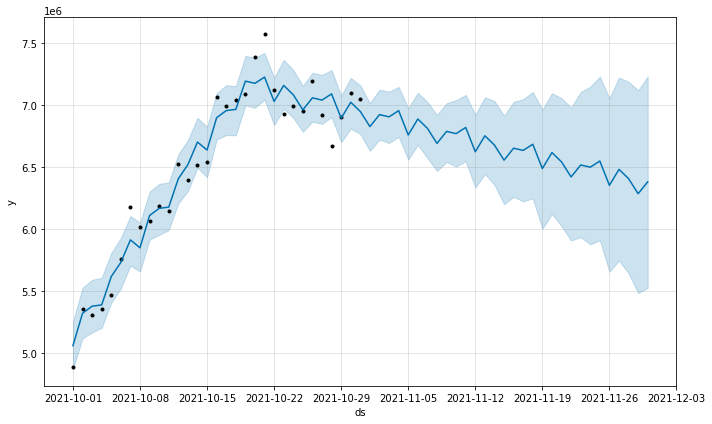

In [14]:
fig1 = m.plot(forecast)

In [15]:
# 11月30日までの予測を算出
forecast_202111 = forecast[(forecast['month'] == 11) & (forecast['year'] == 2021)]
# forecast_202111 = forecast[(forecast['ds'] >= dt(2021,11,1)) & (forecast['ds'] < dt(2021,11,29))]
forecast_202111 = forecast_202111[['ds', 'yhat']].reset_index(drop=True)
forecast_202111

,ds,yhat
0,2021-11-01,6.826832e+06
1,2021-11-02,6.923484e+06
2,2021-11-03,6.905617e+06
3,2021-11-04,6.955475e+06
4,2021-11-05,6.759129e+06
5,2021-11-06,6.888074e+06
6,2021-11-07,6.813186e+06
7,2021-11-08,6.691362e+06
8,2021-11-09,6.788015e+06
9,2021-11-10,6.770147e+06


In [16]:
result = pd.DataFrame()

result['ds'] = df_202111['ds']
result['y'] = df_202111['y']
result['yhat'] = forecast_202111['yhat']

# result = result.dropna()
result

,ds,y,yhat
0,2021-11-01,7020855,6.826832e+06
1,2021-11-02,6974062,6.923484e+06
2,2021-11-03,7207841,6.905617e+06
3,2021-11-04,7202090,6.955475e+06
4,2021-11-05,7013651,6.759129e+06
5,2021-11-06,6946372,6.888074e+06
6,2021-11-07,6993322,6.813186e+06
7,2021-11-08,7167354,6.691362e+06
8,2021-11-09,7659317,6.788015e+06
9,2021-11-10,7581048,6.770147e+06


### Calculate MAPE

In [38]:
MAPE = np.mean(abs(result['yhat'] - result['y']) / result['yhat'])
print(f"MAPE: {MAPE}")

MAPE: 0.053305309256668106


### Cross validation

In [29]:
from prophet import Prophet
m = Prophet()
m.fit(df)

from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='30 days', period='30 days', horizon = '30 days')

INFO:prophet:Making 104 forecasts with cutoffs between 2013-06-01 05:15:42 and 2021-11-16 05:15:42


  0%|          | 0/104 [00:00<?, ?it/s]

In [35]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-06-02,12472.233593,11852.070048,13078.626281,12321,2013-06-01 05:15:42
1,2013-06-03,12306.193897,11695.334743,12889.478486,12141,2013-06-01 05:15:42
2,2013-06-05,11052.791210,10450.285811,11625.426846,12203,2013-06-01 05:15:42
3,2013-06-06,10452.247470,9780.012176,11042.405566,11832,2013-06-01 05:15:42
4,2013-06-07,10203.612070,9576.848366,10802.778834,10894,2013-06-01 05:15:42


In [36]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days 18:49:46,3.832916e+11,619105.461704,259402.008621,0.231084,0.157968,0.244475,0.434084
1,3 days 18:44:18,3.687839e+11,607275.803788,262907.247449,0.246280,0.175751,0.258348,0.414791
2,4 days 18:44:18,3.488646e+11,590647.606710,263755.725666,0.260351,0.198828,0.270482,0.408360
3,5 days 18:44:18,3.295636e+11,574076.259518,263145.429111,0.271942,0.201036,0.278759,0.401929
4,6 days 18:44:18,3.234876e+11,568759.726949,260306.335555,0.281775,0.201737,0.286779,0.401929


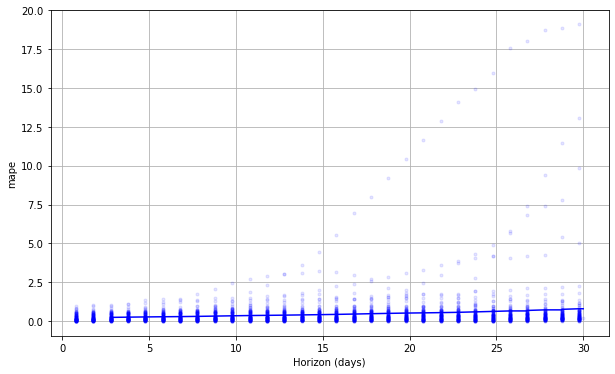

In [37]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')